In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dlai3/sampleSubmission.csv
/kaggle/input/dlai3/datasets/datasets/test/negative/00001304_001.png
/kaggle/input/dlai3/datasets/datasets/test/negative/NORMAL2-IM-0696-0001.jpeg
/kaggle/input/dlai3/datasets/datasets/test/negative/00002860_024.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00003248_001.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00003693_007.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00001951_017.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00002429_000.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00001741_002.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00003392_031.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00002576_008.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00003896_003.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00003779_005.png
/kaggle/input/dlai3/datasets/datasets/test/negative/00001666_001.png
/kaggle/input/dlai3/datasets/datasets/test/negative/p

In [2]:
# !pip install tensorflow-gpu

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-1n4veywd/tensorflow-gpu_0c674b3e24f34d92b979a7e0499fa376/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses

In [5]:
#displaying information about image datasets
def disp_info(path):
  count=0
  for x in os.listdir(path):
    no=len(os.listdir(os.path.join(path,x)))
    print("No. of objects in",x,"is",no)
    count+=no
  return count

In [6]:
train_size = disp_info("/kaggle/input/dlai3/datasets/datasets/train")
test_size = disp_info("/kaggle/input/dlai3/datasets/datasets/test")
print("Training set:", train_size)
print("Training set:", test_size)

No. of objects in negative is 551
No. of objects in positive is 125
No. of objects in negative is 290
No. of objects in positive is 118
Training set: 676
Training set: 408


In [7]:
#Now using generator to scale images in range of 0 to 1
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [8]:
#Some hyperparameters for preprocessing and model training preparation
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_path="/kaggle/input/dlai3/datasets/datasets/train"
test_path="/kaggle/input/dlai3/datasets/datasets/test"

#Importing images dataset from test/train folders
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 676 images belonging to 2 classes.
Found 676 images belonging to 2 classes.


In [10]:
#Now creating CNN sequential model for training our data
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [11]:
#Compiling the model
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [12]:
#Now we finally train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = train_size // batch_size,
    epochs = epochs,
    validation_data = test_data_gen,
    validation_steps = test_size // batch_size
)

/tmp/ipykernel_34/3736736738.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 37s 7s/step - loss: 1.4440 - accuracy: 0.8303 - val_loss: 0.4809 - val_accuracy: 0.8099
Epoch 2/10
5/5 [==============================] - 29s 6s/step - loss: 0.5558 - accuracy: 0.8102 - val_loss: 0.4364 - val_accuracy: 0.8177
Epoch 3/10
5/5 [==============================] - 29s 6s/step - loss: 0.3993 - accuracy: 0.8212 - val_loss: 0.3634 - val_accuracy: 0.7995
Epoch 4/10
5/5 [==============================] - 28s 6s/step - loss: 0.2965 - accuracy: 0.8303 - val_loss: 0.2418 - val_accuracy: 0.9375
Epoch 5/10
5/5 [==============================] - 28s 6s/step - loss: 0.2000 - accuracy: 0.9562 - val_loss: 0.1522 - val_accuracy: 0.9479
Epoch 6/10
5/5 [==============================] - 28s 7s/step - loss: 0.1472 - accuracy: 0.9380 - val_loss: 0.1075 - val_accuracy: 0.9531
Epoch 7/10
5/5 [==============================] - 30s 6s/step - loss: 0.0976 - accuracy: 0.9625 - val_loss: 0.1048 - val_accuracy: 0.9557
Epoch 8/10
5/5 [=============================

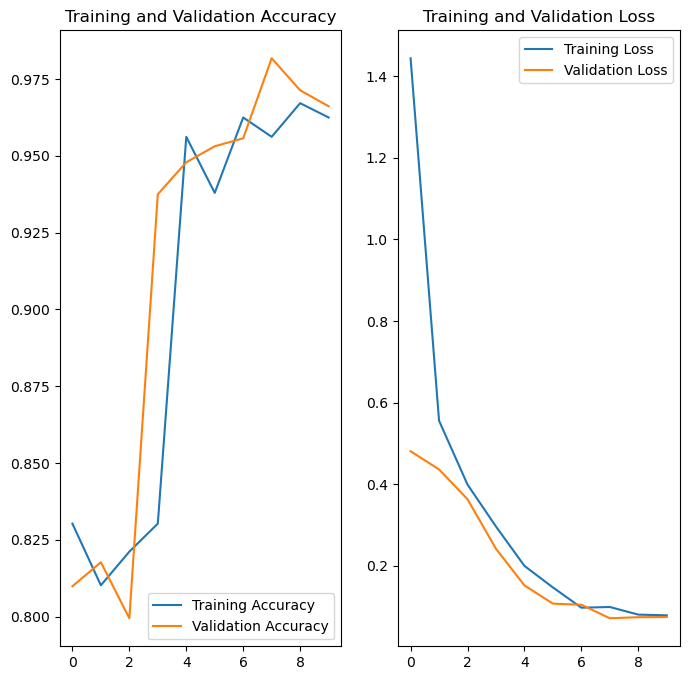

In [13]:
import matplotlib.pyplot as plt

#Visualize model training parameters 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
import cv2

#Importing data to perform predictions on our model
prediction_dataset=[]
predict_path="/kaggle/input/dlai3/DLAI3_CXR_Validation_Set"
for file in os.listdir(predict_path):
    #Reading image from file path using openCV
    file_path=predict_path+"/"+file
    img=cv2.imread(file_path)
    #Resizing image
    trans=cv2.resize(img,(IMG_HEIGHT,IMG_WIDTH))
    trans=trans/255.0
    prediction_dataset.append(trans)

In [17]:
#Converting dataset to numpy array
prediction_dataset=np.array(prediction_dataset)

In [18]:
#Performing predictions and storing it
predictions=np.argmax(model.predict(prediction_dataset),axis=1)

8/8 [==============================] - 1s 151ms/step


In [20]:
#Exporting results of prediction into .csv file
df=pd.DataFrame({"filename":pd.Series(os.listdir(predict_path)),"label":pd.Series(predictions)})
df.to_csv("submit.csv",index=False)    